# BAGGING

In [2]:
# (sample with replacement) of original dataset to make many different samples for training models

In [30]:
# import models and utility functions
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

In [8]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data_pd.columns = data.feature_names
print(data_pd.head())
# assign predictors and dependent to x and y and make dataframe
X =data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [10]:
SEED = 1
# Split data to 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = SEED)

In [12]:
# instantiate a classification tree dt
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 0.16, random_state = SEED)

# Instantiate Bagging Classifier bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)


# fit bc to the training set
bc.fit(X_train, y_train)


# predict the test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Baggign Classifier: {:.3f}'.format(accuracy))

Accuracy of Baggign Classifier: 0.942


# Out of Bag Evaluation

In [13]:
SEED = 1
# Split data to 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = SEED)

In [14]:
# instantiate a classification tree dt
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 0.16, random_state = SEED)


In [17]:
# Instantiate Bagging Classifier bc
# just change oob_score = True as a parameter
bc = BaggingClassifier(base_estimator=dt, n_estimators=300,oob_score =True, n_jobs=-1)

In [18]:
# fit bc to the train set
bc.fit(X_train,y_train)

# predict the test set labels
y_pred = bc.predict(X_test)

In [19]:
# evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# extract the OOB accracy from bc
oob_accuracy = bc.oob_score_

# print the test set accuracy 
print('Test set accuracy: {:.3f}'.format(test_accuracy))

Test set accuracy: 0.936


In [20]:
# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

OOB accuracy: 0.925


#  RANDOM FORESTS

In [21]:
# USES RANDOM SAMPLES SAME SIZE AS TRAINING SET
# EACH TREE TRAINED ON DIFFERENT SAMPLE (WITHOUT REPLACEMENT)

In [91]:
df = pd.read_csv("cars.csv")
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [35]:
y = df[["mpg"]]
X = df[["cylinders", "displacement","weight","acceleration","model year"]]

In [36]:
# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)


In [37]:
# make random forest regressor
rf = RandomForestRegressor(n_estimators = 400, min_samples_leaf=0.12, random_state = SEED)

In [38]:
# fit rf to the training set
rf.fit(X_train, y_train)

# predict the test set labels y_pred
y_pred = rf.predict(X_test)

C:\Users\blake\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [39]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# print the test rmse
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 3.19


# Visualize importance of features

In [40]:
import pandas as pd 
import matplotlib.pyplot as plt

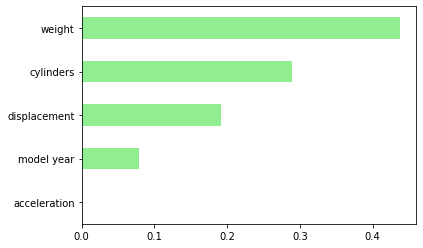

In [41]:
# create a pd.series of features importance
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# make horizontal bar plot
sorted_importances_rf.plot(kind = 'barh', color = 'lightgreen'); plt.show()

# AdaBoost

In [46]:
# BOOSTING MANY WEEK LEARNERS ARE COMBINED TO FORM A STRONG LEARNER
# BOOSTING IS TRAINING AN ENSEMBLE OF PREDICTORS SEQUENTIALLY AND EACH PREDICTOR TRIES TO CORRECT PREDECESSORS
# GRADIENT BOOSTING IS ANOTHER
# ADABOOST IS ADAPTIVE BOOSTING (CHANGING WEIGHTS OF TRAINING INSTANCES)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

In [47]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data_pd.columns = data.feature_names
print(data_pd.head())
# assign predictors and dependent to x and y and make dataframe
X =data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [48]:
SEED = 1
# Split data to 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = SEED)

In [57]:
# instantiate a classification tree dt
dt = DecisionTreeClassifier(max_depth=1, random_state = SEED)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)


In [61]:
# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1] 

In [62]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 1.00


# GRADIENT BOOSTING 

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
df = pd.read_csv("cars.csv")
y = df[["mpg"]]
X = df[["cylinders", "displacement","weight","acceleration","model year"]]

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)


In [69]:
# instantiate a gradient boosting Regressor gbt
gbt = GradientBoostingRegressor(n_estimators=300, max_depth = 1,random_state = SEED)


In [70]:
# fit gbt to the trainingset
gbt.fit(X_train,y_train)

# predict the test set labels
y_pred = gbt.predict(X_test)

#evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 2.68


C:\Users\blake\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Stocastic Gradient Boosting (SGB)

In [72]:
# Gradient boosting sometimes uses same split points and hyper perameters this can be exhaustive
# SGB each tree is trained on a random subset of rows in training data
# the samples are without replacement
# features are ssampled without replacement when choosing split poings
# this creates further diversity for ensemble adding more variance for ensemble of trees

In [73]:
# Continuing with the Auto dataset

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
sgbt = GradientBoostingRegressor(max_depth=1,subsample=0.8,max_features=0.2,n_estimators=300,random_state=SEED)

In [76]:
# fit sgbt to the training set
sgbt.fit(X_train, y_train)

# predict the test set labels
y_pred = sgbt.predict(X_test)

C:\Users\blake\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
# Evaluate test set RMSE rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE: {:.2F}'.format(rmse_test) )

Test set RMSE: 2.68


# HYPERPARAMETER TUNING

In [84]:
from sklearn.model_selection import GridSearchCV
# Import roc_auc_score from sklearn.metrics 
from sklearn.metrics import roc_auc_score

In [100]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data_pd.columns = data.feature_names
print(data_pd.head())
# assign predictors and dependent to x and y and make dataframe
X =data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [101]:
SEED = 1
# Split data to 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = SEED)

In [102]:
# instantiate a classification tree dt
dt = DecisionTreeClassifier(max_depth=1, random_state = SEED)

In [103]:
# Define params_dt
params_dt = {
             'max_depth': [2, 3, 4],
             'min_samples_leaf': [0.12, 0.14, 0.16, 0.18],
            }


In [104]:
# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# fit gbt to the trainingset
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=1,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
           

In [112]:
# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.959


In [110]:
# extract best hyperparameters from grid_dt
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 3, 'min_samples_leaf': 0.14}


# Using Random forest for HPT


In [114]:
from sklearn.ensemble import RandomForestRegressor
# Import GridSearchCV
from sklearn.model_selection import  GridSearchCV
df = pd.read_csv("cars.csv")
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [115]:
y = df[["mpg"]]
X = df[["cylinders", "displacement","weight","acceleration","model year"]]

In [116]:
# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)


In [117]:
# Define the dictionary 'params_rf'
params_rf = {
             'n_estimators': [100, 350, 500],
             'max_features': ['log2', 'auto', 'sqrt'],
             'min_samples_leaf': [2, 10, 30], 
             }

In [125]:
# make random forest regressor
# make random forest regressor
rf = RandomForestRegressor(n_estimators = 400, min_samples_leaf=0.12, random_state = SEED)

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   15.6s finished
C:\Users\blake\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=0.12,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=400, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [126]:
# extract best hyper parameters from grid_rf
best_hyperparams = grid_rf.best_params_

print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 350}


In [127]:

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Test RMSE of best model: 2.613
